In [1]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here
# first of all from runtime change cpu to gpu



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usamajaved1","key":"1d1199e2374b68accd90424ce5110473"}'}

In [2]:
!pip install kaggle



In [3]:
!kaggle datasets download salader/dogs-vs-cats



Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 30.9MB/s]
100% 1.06G/1.06G [00:09<00:00, 119MB/s] 


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,BatchNormalization,Dropout

In [6]:
 # we hhave to gives images to our modek from train folder
# if we slect img one by one then ram is low so here keras use  concept called generators
# it divides whole data into batches generators are very useful to process lagrge amount of data
# keras provide us geneartors its nameis image dataset from directory



In [7]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",#0 and 1 assign to cat and dogs
    batch_size=32,
    image_size=(256,256)#by this all images are of same size

) # by this all code we get the dataset called train dataset
# same for validation data
validation_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",#0 and 1 assign to cat and dogs
    batch_size=32,
    image_size=(256,256)#by this all images are of same size

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# now we have images but these are in numpy array ranges 0 to 255 we counvert it to 0 to 1
# normalization
def process(image,label): # create a function and pass image and label in it
  image = tf.cast(image/255,tf.float32) #divide img by 255 tf.cast use bcz after division its
  # datatype is integer we convert it into float tf.cast convert its data type
  return image,label # now return label and image again

  train_dataset=train_dataset.map(process) # everytime get one image from train_datset and give it to func name process
  # and function give it back and we again store it in train_dataste and validatin_datset
  validation_dataset=validation_dataset.map(process)

In [18]:
# now we create a cmm model and pass this dataset into it
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3),padding="valid"))
# all are expalin in reg 32 filters,kernel is size of filter,shape 256,256,3 mean its dimension of img
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding="valid"))
# all are expalin in reg 32 filters,kernel is size of filter,shape 256,256,3 images once time
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu",padding="valid"))
# all are expalin in reg 32 filters,kernel is size of filter,shape 256,256,3 images once time
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu")) # nodes
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid")) # output_node

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
# now we will compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [21]:
# now we run model
history = model.fit(train_dataset,epochs=10,validation_data= validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 87ms/step - accuracy: 0.5533 - loss: 2.5202 - val_accuracy: 0.6496 - val_loss: 0.6348
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 82ms/step - accuracy: 0.6779 - loss: 0.6148 - val_accuracy: 0.7260 - val_loss: 0.5493
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7608 - loss: 0.4963 - val_accuracy: 0.7546 - val_loss: 0.4932
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.8042 - loss: 0.4336 - val_accuracy: 0.8014 - val_loss: 0.4360
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.8428 - loss: 0.3555 - val_accuracy: 0.7888 - val_loss: 0.5471
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 106ms/step - accuracy: 0.8812 - loss: 0.2819 - val_accuracy: 0.7710 - val_loss: 0.5391
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.9097 - loss: 0.2165 - val_accuracy: 0.7730 - val_loss: 0.6479
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 88ms/step - accuracy: 0.9293 - loss: 0.1674 -

In [13]:
# due to 32 batchsize we have 625 batches 625*32 = 20000 total images
#


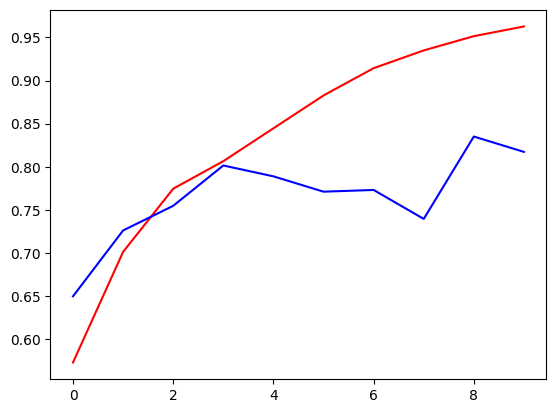

In [25]:
# after dropout and batch normalization
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="val_accuracy")
plt.show()


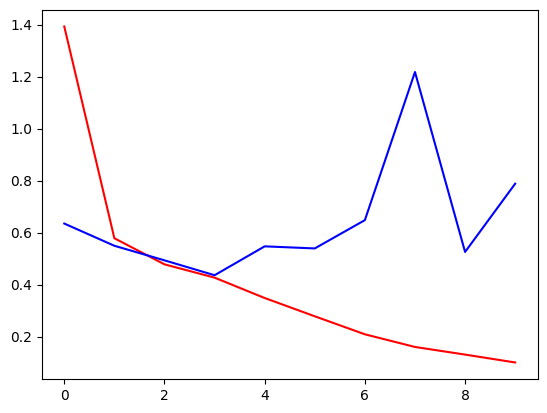

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="val_accuracy")
plt.show()


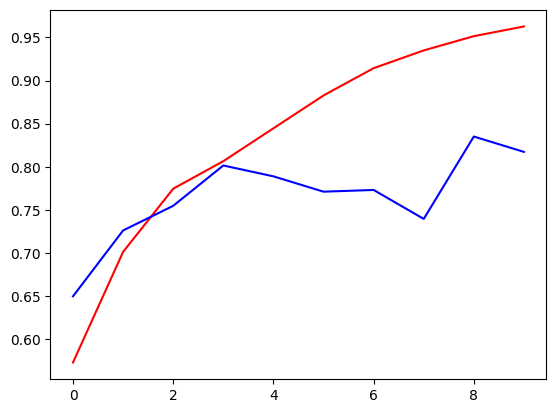

In [27]:
# before dropout and batch normalization
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="val_accuracy")
plt.show()
# there is the huge gap mean there is overfitting

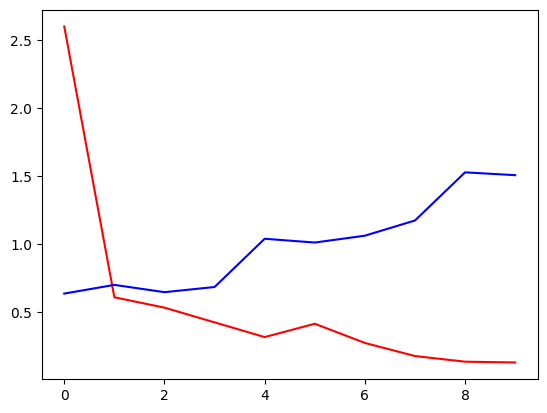

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="val_accuracy")
plt.show()
# there is the huge gap mean there is overfitting

In [22]:
# we can reduce overfitting by these things
# add more data
# data augmenattion
# dropout
# batch normalization
# reduce complexity


In [28]:
# now lets predict something
import cv2 # used to import images from gallery

In [52]:
test_img= cv2.imread("/content/dog.jpg")

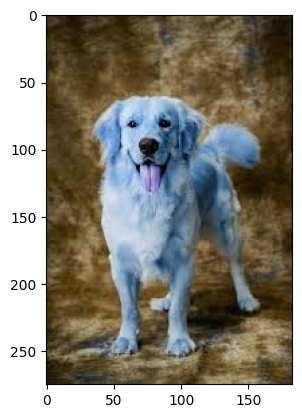

In [53]:
plt.imshow(test_img)

In [54]:
test_img.shape

(275, 183, 3)

In [55]:
test_img=cv2.resize(test_img,(256,256)) # according to our model input sghape

In [56]:
test_input=test_img.reshape((1,256,256,3)) # 1 img and 256,256,3 is input dimension
# 1 ccz we pass data in batches to our model

In [57]:
output = model.predict(test_input) #

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [58]:
if output >= 0.5 :
  print("Dog")
else:
    print("cat")

Dog
